# Air Quality Data Statistics 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
import thinkstats2
import scipy.stats
import thinkplot

In [2]:
df=pd.read_csv("CompletedDataset.csv")

In [3]:
df.head()

,City,AQI,Precipitation,GDP,Temperature,Longititute,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48


## Chi - Square Testing##

### Check whether that AQI of a city is dependent on its latitude?

In [4]:
# Null Hypothesis(H0):AQI of a city is independent on its latitude
# Alternate Hypothesis(H1):AQI of a city is dependent on its latitude
alpha = 0.05
table = pd.crosstab(df["AQI"],df["Latitude"])
from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(table.values)
print('chi-square statistic %0.3f p_value %0.3f' %(chi2,p))


    
if p>=alpha:
    print("Accept H0 and AQI of a city is independent on its latitude")
else:
    print("Reject H0 and AQI of a city is dependent on its latitude")

chi-square statistic 41021.000 p_value 0.328
Accept H0 and AQI of a city is independent on its latitude


## Bayes Theorem

### 10 percent of cities in a given year will have a precipitation at any given time.85 percent of the cities have low aqi level due to precipitation and 5 percent of the cities will have low aqi when there is no precipitation. what is the probability of occurence of precipitation if the aqi is low ?


In [5]:
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b):
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b
 
# P(A)
p_a = 0.1
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(not A)
not_a = 1 - p_a
# calculate P(B)
p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 65.385%


### 60 percent of the cities have high aqi in china,90 percent of the cities treat their waste by incineration and 84 percent of the cities with high aqi level,treat most of their waste by incineration. What is the probability of high aqi level with high incineration ? 

In [6]:
# P(A)
p_a = 0.6
# P(B|A)
p_b_given_a = 0.84
# P(B)
p_b = 0.9
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 56.000%


## Hypothesis Testing

### The Govt. claims that the avg. aqi of china is above avg aqi range. a random sample of 35 cities have a mean aqi of 69.28. Is there sufficient data to support the claim? mean population aqi is 75.33 with std. 23.

In [7]:
import random
aqi = df['AQI'].values
a = random.choices(aqi, k = 35)
print(a)

[18, 122, 106, 86, 48, 132, 96, 21, 55, 195, 65, 13, 64, 51, 91, 66, 104, 106, 68, 41, 65, 91, 37, 110, 28, 113, 76, 111, 56, 120, 220, 56, 88, 16, 202]


In [8]:
# Null Hypothesis(H0):AQI of a city is above average AQI range
# Alternate Hypothesis(H1):AQI of a city is below average AQI range
mu = 75.33
sigma = 23
sample_mean = np.mean(a)
z_score=(sample_mean-mu)/sigma 
p_value = scipy.stats.norm.sf(abs(z_score)) 
print('P-value= {}'.format(p_value))
 
if p_value<0.05: 
     print('P-value<alpha: reject H0') 
else: 
     print('P-value>alpha: accept H0')

P-value= 0.35448870431824453
P-value>alpha: accept H0


## PDF(Probability Density Function) for a column

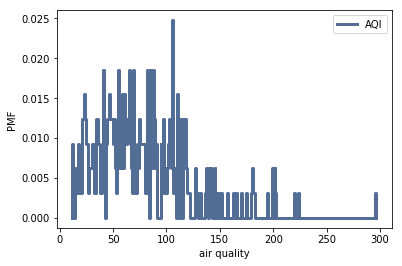

In [9]:
import thinkplot
pmf = thinkstats2.Pmf(df.AQI, label='AQI')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='air quality', ylabel='PMF')

## CDF(Cumulative Density Function) for a column

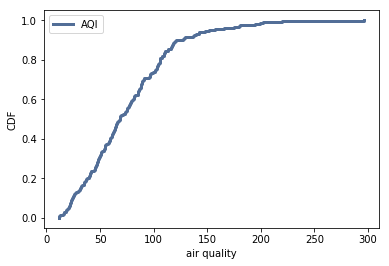

In [10]:
cdf = thinkstats2.Cdf(df.AQI, label='AQI')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='air quality', ylabel='CDF')

## To Check The Normal Distribution for a column

Mean, Var 69.6829268292683 140.29783858814199
Sigma 11.844738856899378


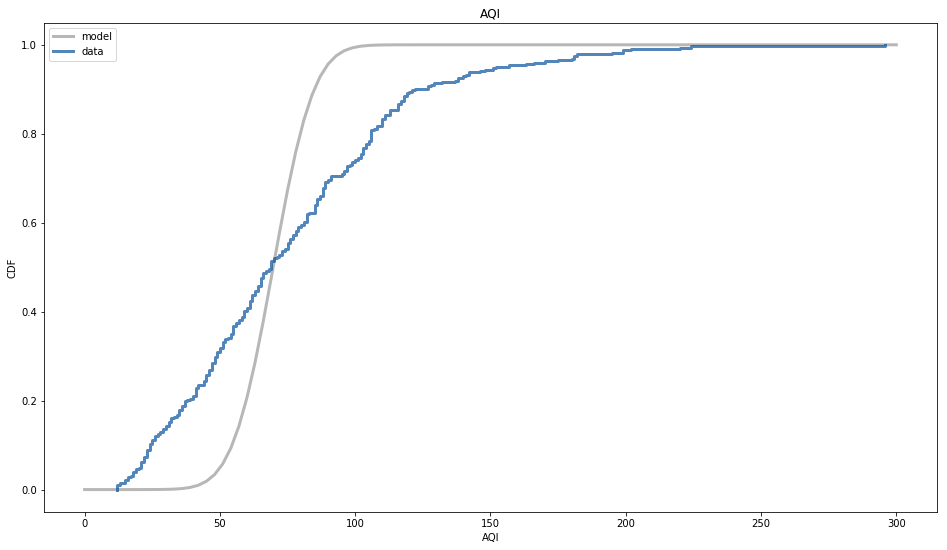

In [11]:
plt.figure(figsize=(16,9))
# estimate parameters: trimming outliers yields a better fit
# Calculate the mean and variance of weights after removing 1% of data from each end
mu, var = thinkstats2.TrimmedMeanVar(df.AQI, p=0.31) # remove 1% of values from each end
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=300)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df.AQI, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 

thinkplot.Config(title='AQI',
                 xlabel='AQI',
                 ylabel='CDF')

## To Check The Exponential Distribution for a column

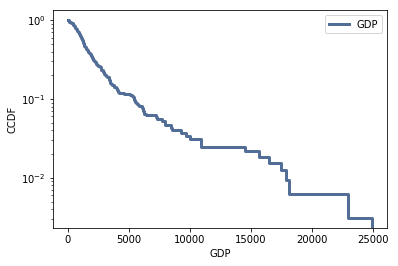

In [12]:
cdf1 = thinkstats2.Cdf(df.GDP, label='GDP')
thinkplot.Cdf(cdf1, complement=True)
thinkplot.Config(xlabel='GDP',
                 ylabel='CCDF', yscale='log', loc='upper right')

## Binomial Distribution Probabilities

In [13]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

### What is the probability of getting best air quality in cities in the coastal area ?

In [14]:
df3=df[df['Coastal']==1]
df4=df3['AQI']
EvalCdf(df4,50)

0.4875

### What is the probability of getting worst air quality of china ?

In [15]:
a=1-EvalCdf(df.AQI,50)
a

0.6811145510835913

### What is the probability of burning more than 50,000 tons ?

In [16]:
df2=df['Incineration(10,000ton)']
b=1-EvalCdf(df2,5)
b

0.9876160990712074

### What is the probability of getting best air quality having high altitudes ?

In [17]:
df3=df[df['Altitude']>350]
df4=df3['AQI']
EvalCdf(df4,50)


0.3780487804878049

## Poisson Distribution Probabilities

### What's the probability of the greencoveragerate to be less than 36 percent in next 10 years ?

In [18]:
from numpy import *
import numpy as np
import math

def poisson(r, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**r/math.factorial(r)) * np.exp(-lamb) 
a=df['GreenCoverageRate'].mean()
poisson(10,a)


4.093268243887387e-08

## Confidence Interval 

### A group of 50 cities have a mean aqi of 71.6 and the sample standard deviation was 37.5. find the ci for a sample of all the cities?By taking confidence level = 95%

In [19]:
import random
aqi = df['AQI'].values
a = random.choices(aqi, k = 50)

confidence = 0.95

import numpy as np
import scipy.stats


def mean_confidence_interval(a, confidence=0.95):
    n=50
    s, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1+confidence)/2, n-1)
    return ( s-h, s+h)

mean_confidence_interval(a)
    

(66.43647645616394, 91.64352354383607)